In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import cryptocompare
from pmdarima.arima import auto_arima
from pmdarima.metrics import smape

In [ ]:
cryptocompare.cryptocompare._set_api_key_parameter('YOUR_API_KEY')

In [3]:
def run_model(ticker):

    raw_data = cryptocompare.get_historical_price_day(ticker, 'USD', limit=30) #limit=30

    historical_data = pd.DataFrame.from_dict(raw_data)
    historical_data['date'] = pd.to_datetime(historical_data['time'], unit='s')
    historical_data.set_index('date',inplace=True)
    historical_data = historical_data[['close']]

    model = auto_arima(historical_data)

    historical_predictions = pd.DataFrame(model.predict_in_sample())
    historical_predictions.columns = ['close']
    
    future_predictions = pd.DataFrame(model.predict(n_periods = 1))
    future_predictions.columns = ['close']

    plt.figure(figsize=(14,5))
    plt.plot(historical_data, label='historical data')
    plt.plot(historical_predictions.iloc[1:], 'r', label='historical predictions')
    plt.plot(future_predictions, 'go', label='future predictions')
    plt.title(f'{ticker}/USD Historical vs Predictions')
    plt.legend()
    plt.grid()
    plt.show()

    error = smape(historical_data.iloc[1:],historical_predictions.iloc[1:])
    print('SMAPE:', error)
    print(model.summary())

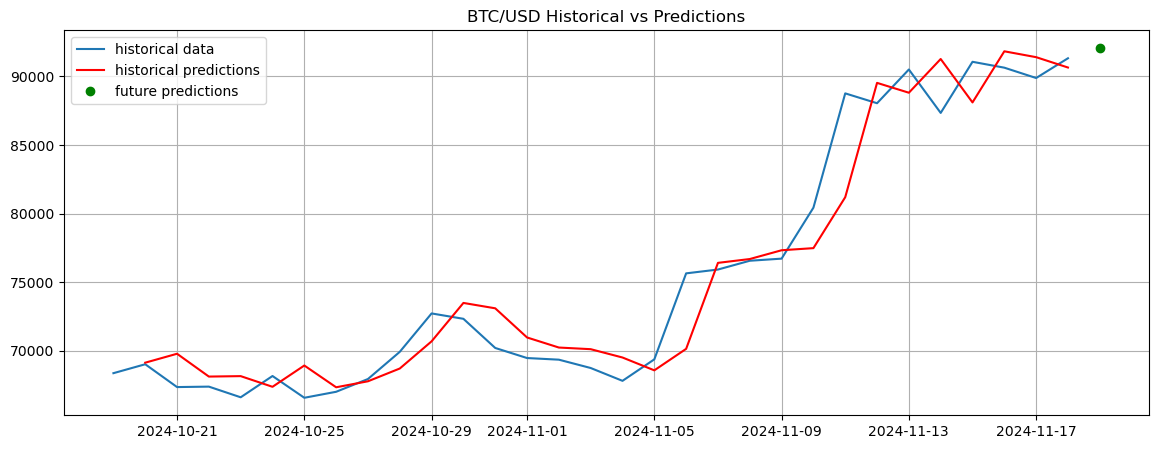

SMAPE: 2.28068691196899
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -275.738
Date:                Mon, 18 Nov 2024   AIC                            555.476
Time:                        14:36:26   BIC                            558.278
Sample:                    10-19-2024   HQIC                           556.372
                         - 11-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    764.8557    575.335      1.329      0.184    -362.781    1892.492
sigma2      5.636e+06   1.36e+06      4.135      0.000    2.96e+06    8.31e+06
Ljung-Box (L1) (Q):         

In [4]:
run_model('BTC')

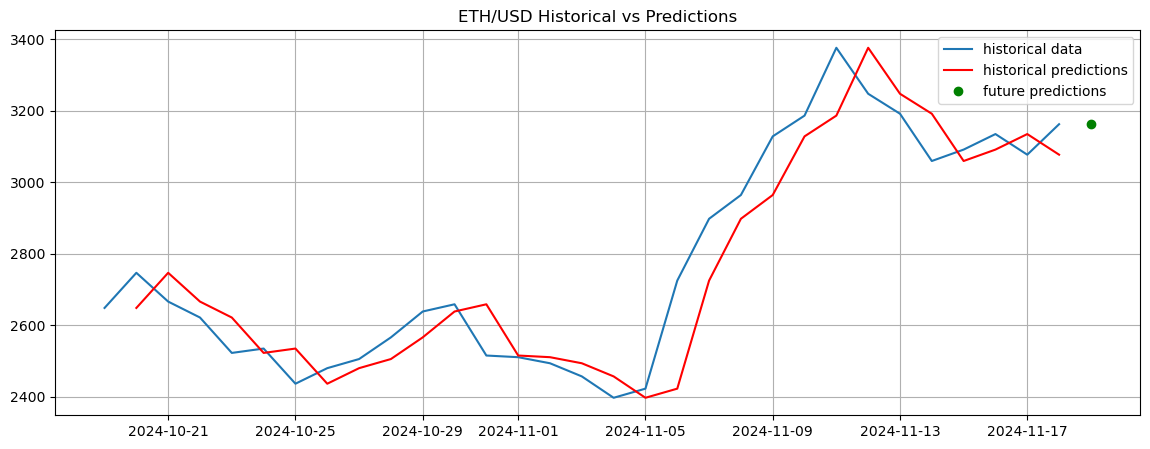

SMAPE: 2.8924586658252176
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -181.625
Date:                Mon, 18 Nov 2024   AIC                            365.250
Time:                        14:36:27   BIC                            366.651
Sample:                    10-19-2024   HQIC                           365.698
                         - 11-18-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.061e+04   2327.564      4.560      0.000    6051.968    1.52e+04
Ljung-Box (L1) (Q):                   2.09   Jarque-Bera (JB):                 2.26
Prob(Q):             

In [5]:
run_model('ETH')